# Лабораторная работа №2
**Вариант №22**

In [1]:
import numpy as np
from numpy import abs, sqrt, sin, cos
from matplotlib import pyplot as plt 

## Задача 2.1 
### Постановка задачи
Методом простой итерации найти  вещественные корни нелинейного уравнения  $f(𝑥)=0$ с точностью $\varepsilon = 10^{-8}$.

$f(x) = x^3 - 0.9x^2 - x - 0.1$


1. Построим график функции и определим отрезки локализации для каждого корня.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


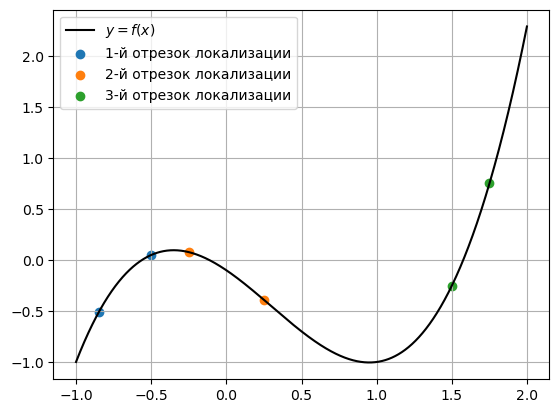

In [3]:
f = lambda x: x**3 - 0.9 * x**2 - x - 0.1
df = lambda x: 3 * x ** 2  - 1.8 * x - 1
# phi = lambda x: x**3 - 0.9 * x ** 2 - 0.1
# dphi = lambda x:  3 * x ** 2  - 1.8 * x

eps = 10**(-8)
x = np.arange(-1, 2, 0.001)
seg1 = np.array([-0.85, -0.5])
seg2 = np.array([-0.25, 0.25])
seg3 = np.array([1.5, 1.75])
plt.plot(x, f(x), "k", label="$y = f(x)$")
# plt.plot(x, x, "r", label="$y = x$")
plt.scatter(seg1, f(seg1), label=f"1-й отрезок локализации")
plt.scatter(seg2, f(seg2), label=f"2-й отрезок локализации")
plt.scatter(seg3, f(seg3), label=f"3-й отрезок локализации")
plt.legend()
plt.grid()
plt.savefig('report/211.eps', format='eps')

 2. Определим производную $f(x)$:

$f'(x) = 3x^2 - 1.8 x - 1$.

Построим график производной и отметим на нём границы отрезков локализации:

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


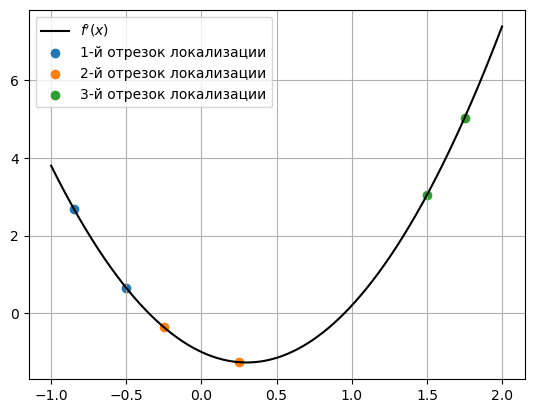

In [4]:
plt.plot(x, df(x), "k", label="$f'(x)$")
plt.scatter(seg1, df(seg1), label=f"1-й отрезок локализации")
plt.scatter(seg2, df(seg2), label=f"2-й отрезок локализации")
plt.scatter(seg3, df(seg3), label=f"3-й отрезок локализации")

plt.grid()
plt.legend()
plt.savefig('report/212.eps')

Из графика видно, что на отрезках локализации производная функции сохраняет постоянный знак.

3. Для каждого корня определим итерационный параметр $\alpha$ и параметр $q$, используя формулы:

$\alpha = \dfrac{2}{M1 + m1}$

$q = \left| \dfrac{M1 - m1}{M1 + m1} \right|$

где $M1=\max_\limits{x\in [a,b]} f'(x),\ m1 = \min_\limits{x\in [a,b]}f'(x)$

4. Составим программу для нахождения корня с заданной точностью $\varepsilon$ по методу простых итераций. В качестве  расчетной формулы используем метод простой итерации с параметром:
$x_{n + 1} = x_n - \alpha f(x_n)$

In [ ]:
# Минимумы и максимумы выбраны приближенно на основе графика
M1 = np.array([df(seg1[0]), df(seg2[0]), df(seg3[1])])
m1 = np.array([df(seg1[1]), df(seg2[1]), df(seg3[0])])
x0 = np.array([seg1[0], seg2[0], seg3[0]])
 

In [ ]:
def MPI(x0, M1, m1, f, eps):
    alpha = 2 / (M1 + m1)
    q = np.abs((M1 - m1) / (M1 + m1))
    x1 = x0 - alpha * f(x0)
    it = 1
    while abs(x1 - x0) > (1 - q) * eps / q:
        x0, x1 = x1, x1 - alpha * f(x1)
        it += 1
    print(f"Выполнено {it} итераций")
    return x1
roots = [MPI(start, M, m, f, eps) for start, M, m in zip(x0, M1, m1)]
roots = np.array(roots)
print("Корни: ", *np.round(roots, 8))
*M1, *m1

In [ ]:
plt.plot(x, f(x), "k", label="$f(x)$")
plt.scatter(roots, f(roots))
plt.grid()